# Normal Distribution

***


### Introduction

The normal distibution is one of the most important and frequently-encountered probability distributions in the field of data science. In this notebook I will explore the and also create some visualisations to illustrate the nature of normally-distributed data.

The Normal (Gaussian) Distribution

The Normal Distribution is often refered to as the Gaussian, or Laplace-Gauss, distribution after the German mathematician Carl Friedrich Gauss and French polymath Pierre-Simon Laplace.  Since most of the values in a normally-distibuted set of data are grouped around the centre, the Normal distribution is also often referred to as a "bell curve" because of it's distinctive shape.

The probability density function of the normal distribution is summed up by the  mathematical equation in the below image:

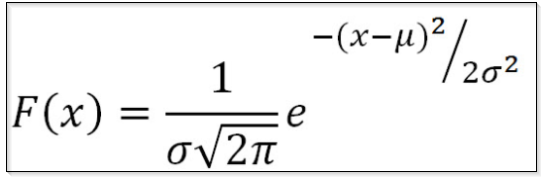

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# generate a random normal distribution 
np.random.normal(size = (4,4))

array([[ 0.40387967, -2.19566672, -1.19846892, -0.7627096 ],
       [ 0.47075354, -0.8287689 , -1.26641411, -0.625122  ],
       [-1.40193388,  0.86522003,  0.48305974, -0.81257941],
       [ 1.53249075, -1.23836151, -2.54352477, -0.67015817]])

### A Real World Example of the Normal distribution

In the following section I will look at an example of some normally-distributed data taken from a real-world data set of world population rates.  To do this I imported a CSV file containing information on population growth since 1970, with columns for Area, Population Density, Growth Rate etc.  To illustrate an example of normally-distributed data, I will focus on the data in the Growth Rate column.

In [4]:
# import CSV file into pandas dataframe
df=pd.read_csv (r"C:\Users\cusac\OneDrive\Desktop\world_population.csv")

In [5]:
# print first 7 rows to get a sense of the data
df.head(7)

,Rank,Country,Continent,2020 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,38972230,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2866849,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,43451666,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,46189,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,77700,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,Angola,Africa,33428485,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,Anguilla,North America,15585,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00


In [7]:
# focusing on the data in the Growth Rate column
# find mean growth rate
df['Growth Rate'].mean()

1.0095773504273502

In [8]:
# find standard deviation of growth rate
df['Growth Rate'].std()

0.01338498453399876

In [9]:
# find min and max of growth rate
df['Growth Rate'].min()

0.912

In [10]:
df['Growth Rate'].max()

1.0691

Text(0, 0.5, 'Frequency')

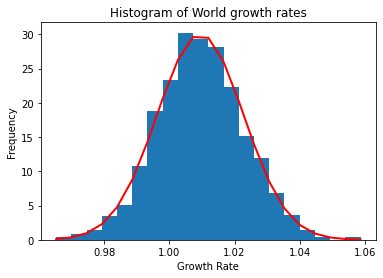

In [6]:
# create histogram of growth rate (world population) incorporating probability density function
mean, std = 1.0095, 0.0133 # mean and standard deviation
s = np.random.normal(mean, std, 1000)
count, bins, ignored = plt.hist(s, 20, density=True)   
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *   
               np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.title("Histogram of World growth rates")
plt.xlabel("Growth Rate")
plt.ylabel("Frequency")

As we can see from the above histogram the result is a good example of a normal distribution, with most values clustered around the mean of 1.009. There are two outliers: the country with the lowest growth rate (Ukraine: 0.912) and the country with the highest growth rate (Moldova: 1.06)

## References

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    
https://www.w3schools.com/python/numpy/numpy_random_normal.asp

https://www.w3schools.com/statistics/statistics_normal_distribution.php#:~:text=The%20normal%20distribution%20is%20described,median%20and%20mean%20are%20equal

https://en.wikipedia.org/wiki/Normal_distribution